# Environment setting

In [1]:
# move to source directory
%pwd
%cd ../src
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection/src
__pycache__/    feature_factory.py*   models/              utils/
config/         features/             tests/
configure.py*   main.py*              trainer_factory.py*
experiment.py*  modelapi_factory.py*  transformer.py*


In [2]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
sys.stdout.flush()

In [3]:
# major dirs
ROOTDIR = Path('/home/yh/git/kaggle_ieee-fraud-detection/').resolve()
DATA_DIR = ROOTDIR / 'data/processed'
RAW_DIR = ROOTDIR / 'data/raw'

# Read data

In [12]:
train = pd.read_pickle(DATA_DIR / 'features_train.pkl')
test = pd.read_pickle(DATA_DIR / 'features_test.pkl')

train.shape, test.shape

((590540, 266), (506691, 265))

In [14]:
train.reset_index(inplace=True)
train.set_index('TransactionID', drop=True, inplace=True)


In [46]:
log = pd.read_csv(ROOTDIR / 'log/train/0004.tsv', delimiter='\t')

In [47]:
log.head()

,fold,iteration,train_auc,eval_auc
0,1,10,0.949436,0.868093
1,1,20,0.953324,0.873723
2,1,30,0.956111,0.876465
3,1,40,0.958175,0.879144
4,1,50,0.959658,0.879518


In [48]:
log.shape

(696, 4)

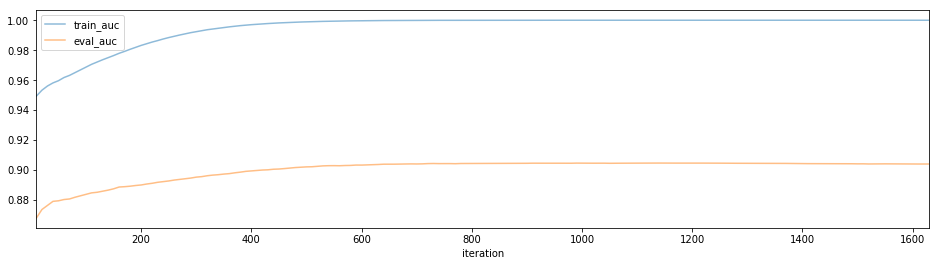

In [49]:
log[log['fold'] == 1].plot(x='iteration', y=['train_auc', 'eval_auc'], figsize=(16,4), alpha=0.5)

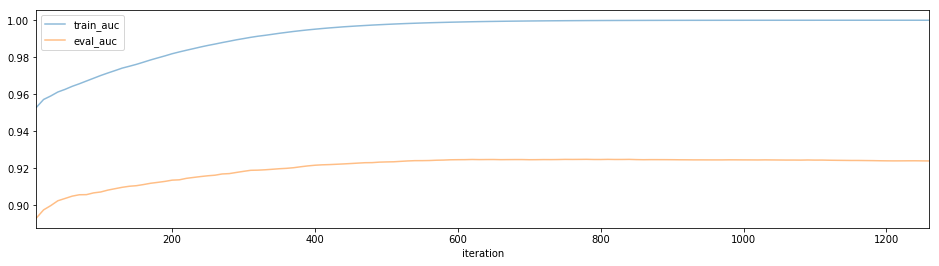

In [50]:
log[log['fold'] == 2].plot(x='iteration', y=['train_auc', 'eval_auc'], figsize=(16,4), alpha=0.5)

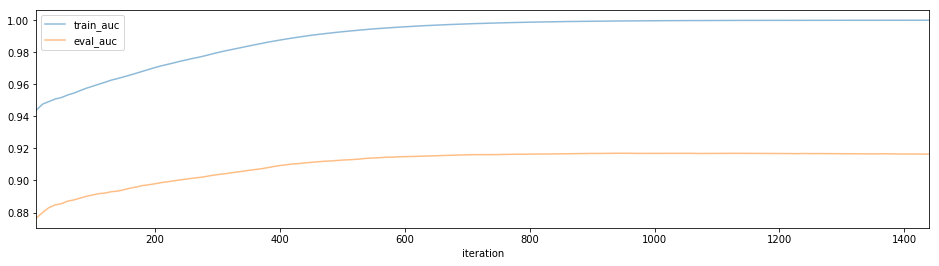

In [51]:
log[log['fold'] == 3].plot(x='iteration', y=['train_auc', 'eval_auc'], figsize=(16,4), alpha=0.5)

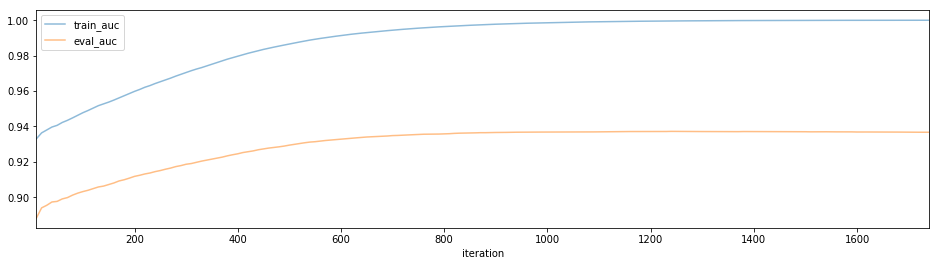

In [52]:
log[log['fold'] == 4].plot(x='iteration', y=['train_auc', 'eval_auc'], figsize=(16,4), alpha=0.5)

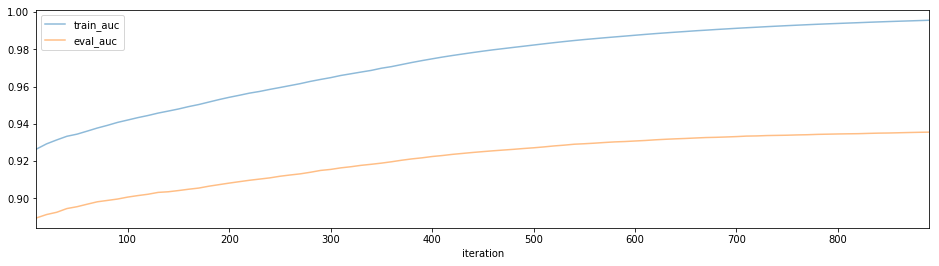

In [53]:
log[log['fold'] == 5].plot(x='iteration', y=['train_auc', 'eval_auc'], figsize=(16,4), alpha=0.5)